In [ ]:
# CAP 6619-002
# Visualize
# Dr. Zhu
# Michael Cuomo

In [3]:
import os
import gc
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import pandas

import collections
import itertools
import pathlib
import re
import csv
import random

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import hamming_loss

In [28]:
LSTM_MODEL_NAME = "mk5_lstm_half_data"
GRU_MODEL_NAME = "mk5_gru_half_data"
DUMMY_MODEL_NAME = "mk5_dummy_half_data"
TEST_DATA_DIRECTORY = "mk5_test_data"
MOVIE_SUBSET = 474
TESTING_SUBSET = 47
RANDOM_SEED = 42

In [29]:
directory = os.fsencode("./data/genres")
movie_names = []
for file in os.listdir(directory):
    movie_names.append(os.fsdecode(file))

shuffled_movies = movie_names.copy()
random.Random(RANDOM_SEED).shuffle(shuffled_movies)
print(movie_names[:20])
print(shuffled_movies[:20])

train_movie_subset = shuffled_movies[:MOVIE_SUBSET]
test_movie_subset = shuffled_movies[-TESTING_SUBSET:]
joined_movie_subset = train_movie_subset + test_movie_subset

print(len(train_movie_subset))
print(len(test_movie_subset))
print(len(joined_movie_subset))

['10_Things_I_Hate_About_You.txt', '12.txt', '127_Hours.txt', '12_and_Holding.txt', '12_Monkeys.txt', '12_Years_a_Slave.txt', '1492_Conquest_of_Paradise.txt', '15_Minutes.txt', '17_Again.txt', '187.txt', '2001_A_Space_Odyssey.txt', '2012.txt', '28_Days_Later.txt', '30_Minutes_or_Less.txt', '44_Inch_Chest.txt', '48_Hrs.txt', '50-50.txt', '500_Days_of_Summer.txt', '8MM.txt', '9.txt']
['Gone_in_60_Seconds.txt', 'Verdict,_The.txt', 'South_Park.txt', 'Semi-Pro.txt', 'Life_of_David_Gale,_The.txt', 'Labor_of_Love.txt', 'American_Beauty.txt', 'Sweeney_Todd_The_Demon_Barber_of_Fleet_Street.txt', 'Star_Trek_The_Motion_Picture.txt', 'Jane_Eyre.txt', 'American_Hustle.txt', 'Ronin.txt', 'Independence_Day.txt', 'Cliffhanger.txt', 'Mighty_Morphin_Power_Rangers_The_Movie.txt', 'Highlander.txt', 'English_Patient,_The.txt', 'Excalibur.txt', "Something's_Gotta_Give.txt", 'Kill_Bill_Volume_1_%2526_2.txt']
474
47
521


In [30]:
genre_dict = dict()
max_size = 0
max_movie_name = ""
genre_directory = os.fsencode("./data/genres")

for file in os.listdir(genre_directory):
    if os.fsdecode(file) in joined_movie_subset:
        f = open(f"{os.fsdecode(genre_directory)}/{os.fsdecode(file)}", "r")
        genres = f.read().split(",")
        f.close()
        if len(genres) > max_size:
            max_size = len(genres)
            max_movie_name = os.fsdecode(file)
        for genre in genres:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] += 1

sorted_genres = sorted(genre_dict.items(), key = lambda kv: kv[1], reverse = True)

In [31]:
print(max_size)
print(max_movie_name)

8
Anastasia.txt


In [32]:
genre_data_frame = pandas.DataFrame(sorted_genres)
genre_data_frame.style.hide(axis="index").hide(axis="columns")

Drama,256
Comedy,175
Thriller,158
Crime,123
Action,113
Romance,97
Adventure,91
Sci-Fi,70
Mystery,68
Fantasy,49
Horror,48


In [ ]:
def plot_graphs(histories, legendNames, ylabel, title, metric):
  for history in histories:
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend(list(itertools.chain.from_iterable(map(lambda x: [x, 'Validation ' + x], legendNames))))

In [4]:
with open(f'./models/{TEST_DATA_DIRECTORY}/test_data', 'rb') as file_pi:
    test_data = pickle.load(file_pi)

In [33]:
with open(f'./models/{TEST_DATA_DIRECTORY}/test_data', 'rb') as file_pi:
    half_test_data = pickle.load(file_pi)

In [6]:
data_frame = pandas.DataFrame(test_data)
data_frame.style

,lstm,gru,dummy
test_loss,0.309386,0.294271,1.356254
test_acc,0.907556,0.909435,0.911982


In [34]:
data_frame = pandas.DataFrame(half_test_data)
data_frame.style

,LSTM,GRU,Dummy
Test Loss,0.302116,0.291523,1.583146
Test Accuracy,0.892585,0.892562,0.897262


In [13]:
lstm_history = pandas.read_csv(f"./models/{os.fsdecode(LSTM_MODEL_NAME)}/training_0/log_history.csv")
gru_history = pandas.read_csv(f"./models/{os.fsdecode(GRU_MODEL_NAME)}/training_0/log_history.csv")
dummy_history = pandas.read_csv(f"./models/{os.fsdecode(DUMMY_MODEL_NAME)}/training_0/log_history.csv")

In [35]:
half_lstm_history = pandas.read_csv(f"./models/{os.fsdecode(LSTM_MODEL_NAME)}/training_0/log_history_combined.csv")
half_gru_history = pandas.read_csv(f"./models/{os.fsdecode(GRU_MODEL_NAME)}/training_0/log_history.csv")
half_dummy_history = pandas.read_csv(f"./models/{os.fsdecode(DUMMY_MODEL_NAME)}/training_0/log_history.csv")

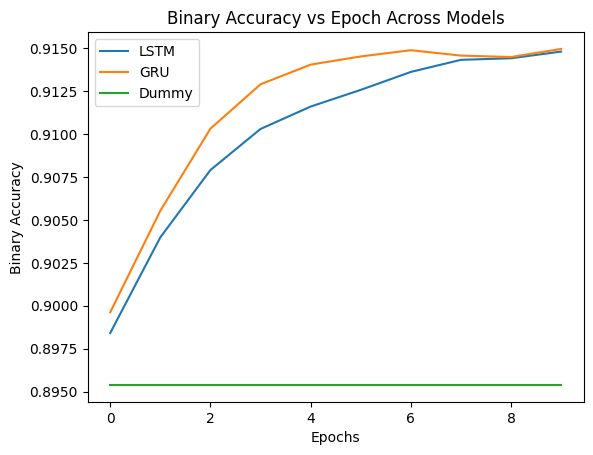

In [33]:
plt.plot(lstm_history["binary_accuracy"])
plt.plot(gru_history["binary_accuracy"])
plt.plot(dummy_history["binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Binary Accuracy")
plt.title("Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])

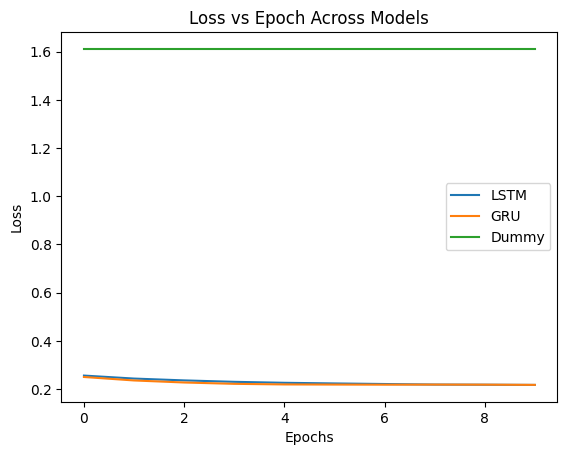

In [34]:
plt.plot(lstm_history["loss"])
plt.plot(gru_history["loss"])
plt.plot(dummy_history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])

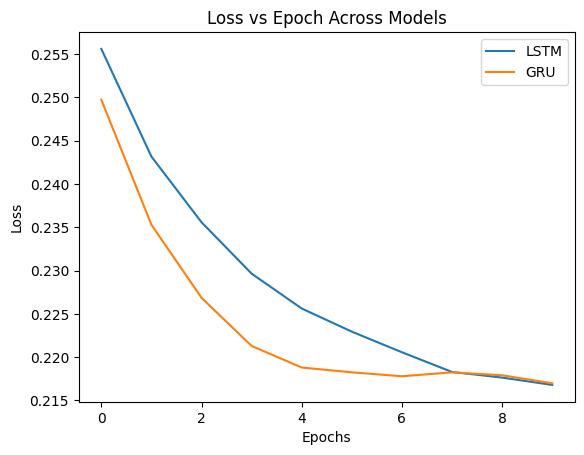

In [35]:
plt.plot(lstm_history["loss"])
plt.plot(gru_history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Across Models")
plt.legend(["LSTM", "GRU"])

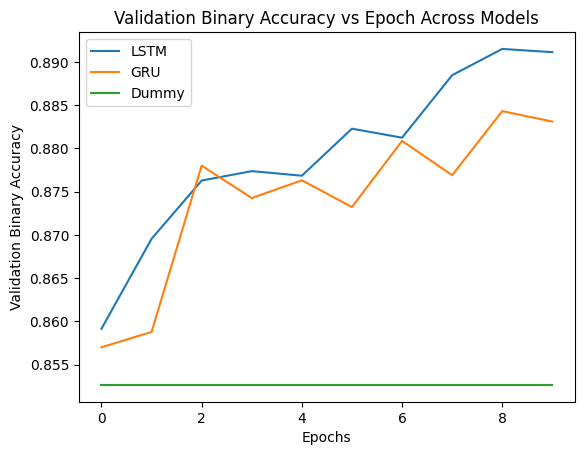

In [36]:
plt.plot(lstm_history["val_binary_accuracy"])
plt.plot(gru_history["val_binary_accuracy"])
plt.plot(dummy_history["val_binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Binary Accuracy")
plt.title("Validation Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])

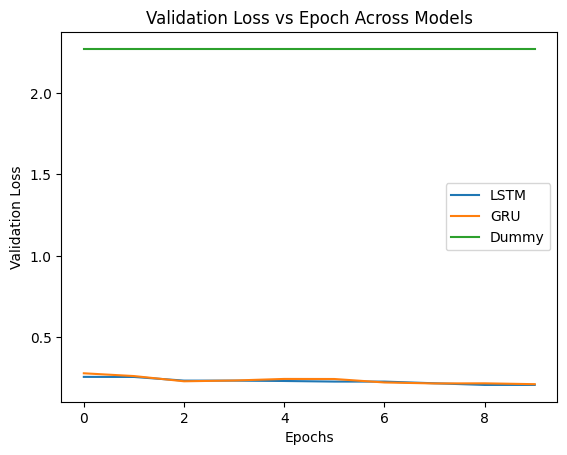

In [37]:
plt.plot(lstm_history["val_loss"])
plt.plot(gru_history["val_loss"])
plt.plot(dummy_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])

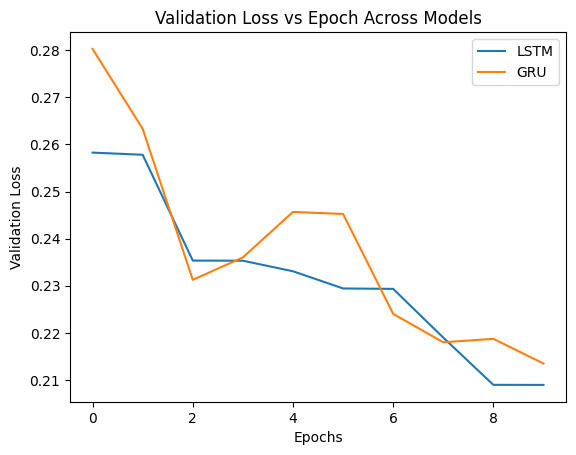

In [38]:
plt.plot(lstm_history["val_loss"])
plt.plot(gru_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epoch Across Models")
plt.legend(["LSTM", "GRU"])

<Figure size 640x480 with 0 Axes>

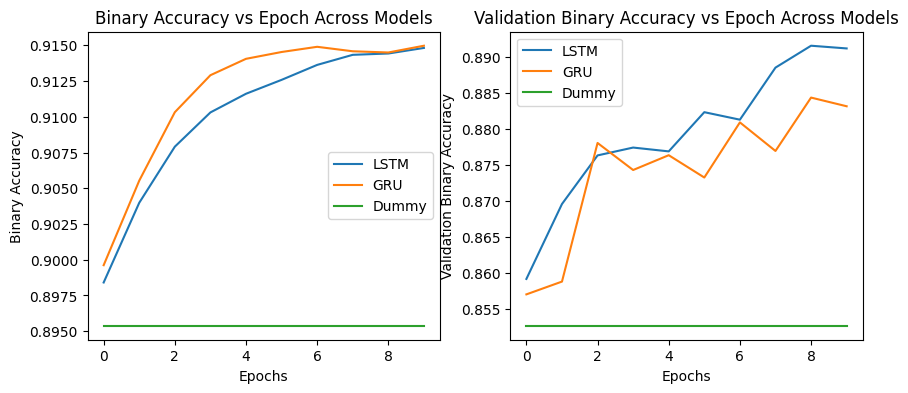

In [27]:
plt.tight_layout()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history["binary_accuracy"])
plt.plot(gru_history["binary_accuracy"])
plt.plot(dummy_history["binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Binary Accuracy")
plt.title("Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])
plt.subplot(1, 2, 2)
plt.plot(lstm_history["val_binary_accuracy"])
plt.plot(gru_history["val_binary_accuracy"])
plt.plot(dummy_history["val_binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Binary Accuracy")
plt.title("Validation Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM", "GRU", "Dummy"])

<Figure size 640x480 with 0 Axes>

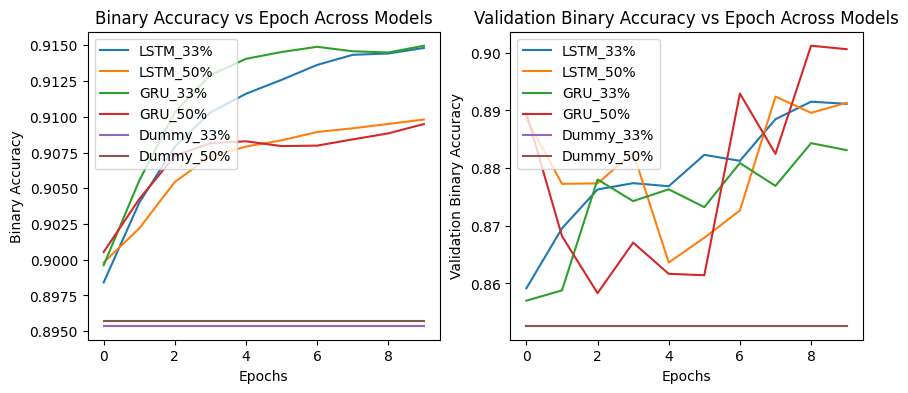

In [42]:
plt.tight_layout()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history["binary_accuracy"])
plt.plot(half_lstm_history["binary_accuracy"])
plt.plot(gru_history["binary_accuracy"])
plt.plot(half_gru_history["binary_accuracy"])
plt.plot(dummy_history["binary_accuracy"])
plt.plot(half_dummy_history["binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Binary Accuracy")
plt.title("Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%", "Dummy_33%", "Dummy_50%"], loc = "upper left")
plt.subplot(1, 2, 2)
plt.plot(lstm_history["val_binary_accuracy"])
plt.plot(half_lstm_history["val_binary_accuracy"])
plt.plot(gru_history["val_binary_accuracy"])
plt.plot(half_gru_history["val_binary_accuracy"])
plt.plot(dummy_history["val_binary_accuracy"])
plt.plot(half_dummy_history["val_binary_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Binary Accuracy")
plt.title("Validation Binary Accuracy vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%", "Dummy_33%", "Dummy_50%"])

<Figure size 640x480 with 0 Axes>

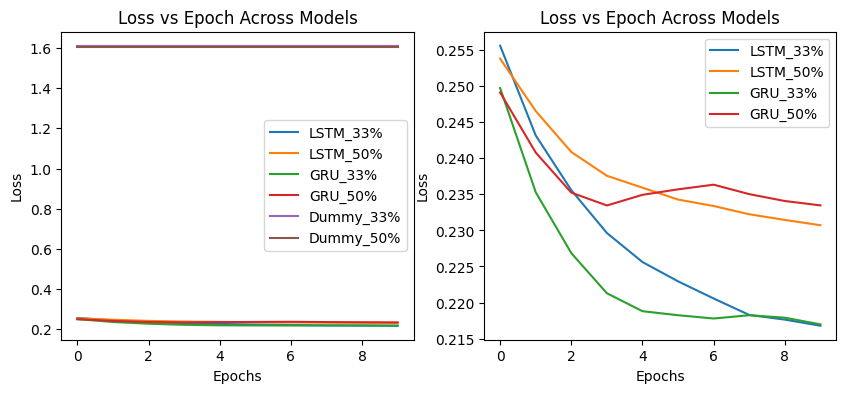

In [38]:
plt.tight_layout()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history["loss"])
plt.plot(half_lstm_history["loss"])
plt.plot(gru_history["loss"])
plt.plot(half_gru_history["loss"])
plt.plot(dummy_history["loss"])
plt.plot(half_dummy_history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%", "Dummy_33%", "Dummy_50%"])
plt.subplot(1, 2, 2)
plt.plot(lstm_history["loss"])
plt.plot(half_lstm_history["loss"])
plt.plot(gru_history["loss"])
plt.plot(half_gru_history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%"])

<Figure size 640x480 with 0 Axes>

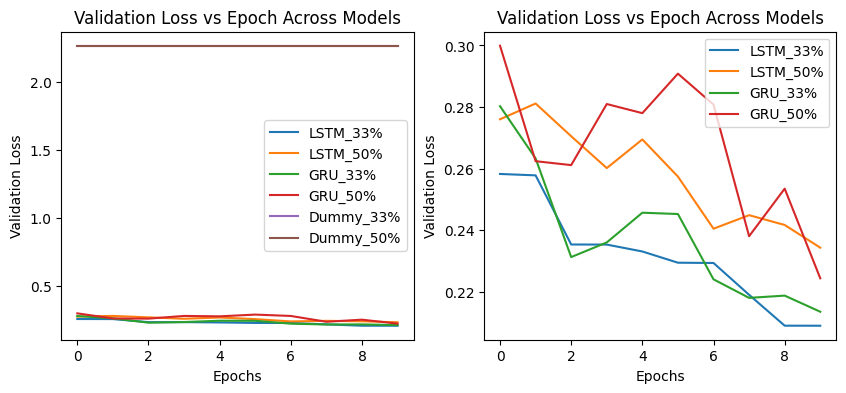

In [39]:
plt.tight_layout()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history["val_loss"])
plt.plot(half_lstm_history["val_loss"])
plt.plot(gru_history["val_loss"])
plt.plot(half_gru_history["val_loss"])
plt.plot(dummy_history["val_loss"])
plt.plot(half_dummy_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%", "Dummy_33%", "Dummy_50%"])
plt.subplot(1, 2, 2)
plt.plot(lstm_history["val_loss"])
plt.plot(half_lstm_history["val_loss"])
plt.plot(gru_history["val_loss"])
plt.plot(half_gru_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epoch Across Models")
plt.legend(["LSTM_33%", "LSTM_50%", "GRU_33%", "GRU_50%"])

In [11]:
num_of_lines = 0
max_script_size = 0
max_script_movie_name = ""
scripts_directory = os.fsencode("./data/scripts")

for file in os.listdir(scripts_directory):
    f = open(f"{os.fsdecode(scripts_directory)}/{os.fsdecode(file)}", "r", encoding="utf-8")
    lines = f.read().split("\n")
    f.close()
    if len(lines) > max_script_size:
        max_script_size = len(lines)
        max_script_movie_name = os.fsdecode(file)
    num_of_lines += len(lines)

print(f"Average Lines: {num_of_lines / 948}")
print(f"Max Movie Name: {max_script_movie_name}")
print(f"Max Movie Size: {max_script_size}")

Average Lines: 4478.059071729957
Max Movie Name: Casino.txt
Max Movie Size: 11224
